# Produisez une étude de marché

# Scénario
Votre entreprise **d'agroalimentaire** souhaite se développer à l'international. Elle est spécialisée dans...
 le poulet !

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Votre objectif sera d'aider **à cibler plus particulièrement certains pays**, dans le but d'approfondir ensuite l'étude de marché. Plus particulièrement, l'idéal serait de produire des "groupes" de pays, plus ou moins gros, dont on connaît les caractéristiques.

Dans un premier temps, la stratégie est plutôt d'exporter les produits plutôt que de produire sur place, c'est-à-dire dans le(s) nouveau(x) pays ciblé(s).


Pour identifier les pays propices à une insertion dans le marché du poulet,
 Il vous a été demandé de cibler les pays. 
 Etudier les régimes alimentaires de chaque pays, notamment en termes de protéines d'origine animale et en termes de calories.


Construisez votre échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :

différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage ;
proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays ;
disponibilité alimentaire en protéines par habitant ;
disponibilité alimentaire en calories par habitant.

Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 

Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP.

Dans votre partition, vous avez obtenu des groupes distincts. Vérifiez donc qu'ils diffèrent réellement. Pour cela, réalisez les tests statistiques suivants :

un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale ;
un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Sur ces 2 clusters, testez la variable gaussienne grâce à un test de comparaison.

In [542]:
import pandas as pd


import seaborn as sns
import numpy as np
import matplotlib as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [543]:
#Versions utilisées
print("Jupyter Notebook : " + str(pd.__version__))
print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Seaborn : " + str(sns.__version__))

Jupyter Notebook : 1.2.4
Pandas : 1.2.4
Numpy : 1.20.1
Seaborn : 0.11.1


# 1. Import des données

## 1.1 Import et traitement de la population par pays
la variation de la population entre 2013 et 2019, en %, qui sera positive en cas de croissance ou négative en cas de baisse démographique ;

In [544]:
df_population = pd.read_csv('datas/fao-populations_2019- 2013.csv' , header=0, sep=",", decimal=".")
df_population.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,511,Population totale,2501,Population,2013,2013,1000 personnes,32270,*,Chiffre non officiel
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,511,Population totale,2501,Population,2019,2019,1000 personnes,38042,*,Chiffre non officiel


In [545]:
df_population = df_population[['Code zone', 'Zone', 'Produit', 'Année', 'Valeur']]
df_population['Valeur'] = df_population['Valeur']*1000
df_population.head()

,Code zone,Zone,Produit,Année,Valeur
0,2,Afghanistan,Population,2013,32270000
1,2,Afghanistan,Population,2019,38042000
2,202,Afrique du Sud,Population,2013,53687000
3,202,Afrique du Sud,Population,2019,58558000
4,3,Albanie,Population,2013,2904000


In [546]:
df_population = df_population.pivot_table(index=['Code zone', 'Zone'], columns='Année', values = 'Valeur', aggfunc = sum).reset_index()
df_population.head()

Année,Code zone,Zone,2013,2019
0,1,Arménie,2898000.0,2958000.0
1,2,Afghanistan,32270000.0,38042000.0
2,3,Albanie,2904000.0,2881000.0
3,4,Algérie,38140000.0,43053000.0
4,7,Angola,26016000.0,31825000.0


In [547]:
# différence de population entre 2013 et 2019, exprimée en pourcentage
df_population['Evolution population (%)'] = round(((df_population[2019]-df_population[2013])/df_population[2013])*100,3)


In [548]:
df_population.head(20)

Année,Code zone,Zone,2013,2019,Evolution population (%)
0,1,Arménie,2898000.0,2958000.0,2.070
1,2,Afghanistan,32270000.0,38042000.0,17.887
2,3,Albanie,2904000.0,2881000.0,-0.792
3,4,Algérie,38140000.0,43053000.0,12.881
4,7,Angola,26016000.0,31825000.0,22.329
5,8,Antigua-et-Barbuda,92000.0,97000.0,5.435
6,9,Argentine,42196000.0,44781000.0,6.126
7,10,Australie,23255000.0,25203000.0,8.377
8,11,Autriche,8556000.0,8955000.0,4.663
9,12,Bahamas,367000.0,389000.0,5.995


In [549]:
population2013 = df_population[2013].sum()
population2019 = df_population[2019].sum()
evolution_globale = round(((population2019 - population2013) / population2013)*100,3)
print('Pour indication, la population totale en 2013 était de', population2013, 'et de', population2019, 'en 2019.\nL\'évolution 2013/2019 est de', evolution_globale, '%.')


Pour indication, la population totale en 2013 était de 8564484000.0 et de 9108256000.0 en 2019.
L'évolution 2013/2019 est de 6.349 %.


In [550]:
df_population= df_population.rename(columns= {2019: 'population'})
df_population= df_population[['Code zone', 'Zone' , 'population' ,'Evolution population (%)']]
df_population.head(2)


Année,Code zone,Zone,population,Evolution population (%)
0,1,Arménie,2958000.0,2.070
1,2,Afghanistan,38042000.0,17.887


## 2.1 Données sur les bilans alimentaires mondiaux (2019)


le ratio entre la quantité de protéines d’origine animale et la quantité totale de protéines consommées ;


In [551]:
df_dispo_alimentaire = pd.read_csv('datas/FAOSTAT_data.csv', header=0, sep=",", decimal=".")
df_dispo_alimentaire.head(4)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2019,2019,Kcal/personne/jour,2273.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2019,2019,g/personne/jour,57.31,Fc,Donnée calculée
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,684,Disponibilité de matière grasse en quantité (g...,2901,Total General,2019,2019,g/personne/jour,39.78,Fc,Donnée calculée
3,FBS,Bilans Alimentaires (2010-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2019,2019,Kcal/personne/jour,187.00,Fc,Donnée calculée


In [552]:
df_dispo_alimentaire = df_dispo_alimentaire.pivot_table(index=['Code zone', 'Zone', 'Année'],
                                columns=['Élément', 'Produit'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_dispo_alimentaire.head()

Élément Code zone         Zone Année  \
Produit                                
0               1      Arménie  2019   
1               2  Afghanistan  2019   
2               3      Albanie  2019   
3               4      Algérie  2019   
4               7       Angola  2019   

Élément Disponibilité alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                975.0        3022.0   
1                                                187.0        2273.0   
2                                               1021.0        3338.0   
3                                                379.0        3493.0   
4                                                211.0        2445.0   

Élément Disponibilité de matière grasse en quantité (g/personne/jour)  \
Produit                                              Produits Animaux   
0                                                    74.06              
1                                                    12.67              
2                                                    70.01              
3                                                    22.14              
4                                                    15.27              

Élément                \
Produit Total General   
0              115.83   
1               39.78   
2              115.99   
3               98.14   
4               59.42   

Élément Disponibilité de protéines en quantité (g/personne/jour)                
Produit                                         Produits Animaux Total General  
0                                                    52.86               94.29  
1                                                    10.34               57.31  
2                                                    62.47              116.02  
3                                                    24.09               90.84  
4                                                    15.54               52.09

In [553]:
# proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays
df_dispo_alimentaire["dispo_protéines_animales(%)"] = round((df_dispo_alimentaire[('Disponibilité de protéines en quantité (g/personne/jour)', 'Produits Animaux')]
                                                                         /df_dispo_alimentaire[('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General')])*100,3)
df_dispo_alimentaire.head()

Élément Code zone         Zone Année  \
Produit                                
0               1      Arménie  2019   
1               2  Afghanistan  2019   
2               3      Albanie  2019   
3               4      Algérie  2019   
4               7       Angola  2019   

Élément Disponibilité alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                975.0        3022.0   
1                                                187.0        2273.0   
2                                               1021.0        3338.0   
3                                                379.0        3493.0   
4                                                211.0        2445.0   

Élément Disponibilité de matière grasse en quantité (g/personne/jour)  \
Produit                                              Produits Animaux   
0                                                    74.06              
1                                                    12.67              
2                                                    70.01              
3                                                    22.14              
4                                                    15.27              

Élément                \
Produit Total General   
0              115.83   
1               39.78   
2              115.99   
3               98.14   
4               59.42   

Élément Disponibilité de protéines en quantité (g/personne/jour)  \
Produit                                         Produits Animaux   
0                                                    52.86         
1                                                    10.34         
2                                                    62.47         
3                                                    24.09         
4                                                    15.54         

Élément               dispo_protéines_animales(%)  
Produit Total General                              
0               94.29                      56.061  
1               57.31                      18.042  
2              116.02                      53.844  
3               90.84                      26.519  
4               52.09                      29.833

## 3.1  les valeurs de PIB par habitant,
en $ paritaire, c’est à dire normalisé en fonction du coût de la vie.


In [554]:
# Dataframes des données complémentaires
# Indicateurs Macro (PIB et croissance)
df_indicateurs_macro = pd.read_csv('datas/indicateurs_macro.csv', header=0, sep=',', decimal='.')

df_indicateurs_macro.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2019,2019,millions,17876.546427,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,469.919090,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,2,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2019,2019,%,-2.886380,Fc,Donnée calculée,NaN
3,MK,Indicateurs macro,202,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2019,2019,millions,351430.991183,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,6001.389576,X,Sources internationales sûres,NaN


In [555]:
df_indicateurs_macro = df_indicateurs_macro[['Code zone (FAO)','Élément','Valeur','Produit']]
                             
df_indicateurs_macro.head() 

,Code zone (FAO),Élément,Valeur,Produit
0,2,Valeur US $,17876.546427,Produit Intérieur Brut
1,2,Valeur US $ par habitant,469.919090,Produit Intérieur Brut
2,2,Croissance annuelle US$ par habitant,-2.886380,Produit Intérieur Brut
3,202,Valeur US $,351430.991183,Produit Intérieur Brut
4,202,Valeur US $ par habitant,6001.389576,Produit Intérieur Brut


In [556]:
df_indicateurs_macro = df_indicateurs_macro.pivot_table(index=['Code zone (FAO)'], columns='Élément', values='Valeur', aggfunc=sum).reset_index()
df_indicateurs_macro.head() 

Élément,Code zone (FAO),Croissance annuelle US$ par habitant,Valeur US $,Valeur US $ par habitant
0,1,9.529576,13672.801339,4622.733216
1,2,-2.886380,17876.546427,469.919090
2,3,0.928996,15278.072762,5303.197823
3,4,-4.295828,171157.863119,3975.510381
4,6,-2.170092,3154.137481,40887.421647


In [557]:
df_indicateurs_macro = df_indicateurs_macro.rename(columns={"Croissance annuelle US$":"Croissance annuelle PIB US$ (%)",
                                    "Valeur US $":"PIB Total US$ (Millions)",'Code zone (FAO)':'Code zone', 'Valeur US $ par habitant': 'PIB par habitant'})
df_indicateurs_macro.head() 

Élément,Code zone,Croissance annuelle US$ par habitant,PIB Total US$ (Millions),PIB par habitant
0,1,9.529576,13672.801339,4622.733216
1,2,-2.886380,17876.546427,469.919090
2,3,0.928996,15278.072762,5303.197823
3,4,-4.295828,171157.863119,3975.510381
4,6,-2.170092,3154.137481,40887.421647


## 4.1 Le taux de dépendance aux importations, 
défini en économie comme le rapport entre les importations et la disponibilité intérieure du pays ;

In [558]:
df_dépendance_importations = pd.read_csv('datas/la viande de volailles.csv', header=0, sep=",", decimal=".")
df_dépendance_importations.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2019,2019,Milliers de tonnes,28,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2019,2019,Milliers de tonnes,44,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2019,2019,Milliers de tonnes,67,S,Données standardisées


In [559]:

df_dépendance_importations['Valeur'] = df_dépendance_importations['Valeur']*1000000000
df_dépendance_importations.head(3)


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2019,2019,Milliers de tonnes,28000000000,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2019,2019,Milliers de tonnes,44000000000,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2019,2019,Milliers de tonnes,67000000000,S,Données standardisées


In [560]:
df_dépendance_importations = df_dépendance_importations.pivot_table(index=['Code zone', 'Zone', 'Année'],
                                columns=['Élément'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_dépendance_importations

Élément,Code zone,Zone,Année,Disponibilité intérieure,Importations - Quantité,Production
0,1,Arménie,2019,5.500000e+10,4.300000e+10,1.200000e+10
1,2,Afghanistan,2019,6.700000e+10,4.400000e+10,2.800000e+10
2,3,Albanie,2019,3.400000e+10,2.200000e+10,1.200000e+10
3,4,Algérie,2019,2.870000e+11,0.000000e+00,2.910000e+11
4,7,Angola,2019,3.270000e+11,2.780000e+11,4.900000e+10
...,...,...,...,...,...,...
174,256,Luxembourg,2019,1.200000e+10,1.200000e+10,0.000000e+00
175,272,Serbie,2019,1.120000e+11,1.700000e+10,1.040000e+11
176,273,Monténégro,2019,1.000000e+10,7.000000e+09,4.000000e+09
177,276,Soudan,2019,5.600000e+10,0.000000e+00,7.500000e+10


In [561]:
df_dépendance_importations['taux_dépendance_importations']=df_dépendance_importations['Importations - Quantité']    / df_dépendance_importations['Disponibilité intérieure']*100
df_dépendance_importations.head(2)

Élément,Code zone,Zone,Année,Disponibilité intérieure,Importations - Quantité,Production,taux_dépendance_importations
0,1,Arménie,2019,5.500000e+10,4.300000e+10,1.200000e+10,78.181818
1,2,Afghanistan,2019,6.700000e+10,4.400000e+10,2.800000e+10,65.671642


In [562]:
df_dépendance_importations = df_dépendance_importations[['Code zone', 'Disponibilité intérieure','Importations - Quantité', 'Production','taux_dépendance_importations']]

## 5.1 Construction et sauvegarde du dataframe principal


In [563]:
df_dispo_alimentaire_etendu = pd.merge(df_population, df_dispo_alimentaire, on="Code zone")

df_dispo_alimentaire_etendu.head(2)

/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Code zone,Zone,population,Evolution population (%),"(Zone, )","(Année, )","(Disponibilité alimentaire (Kcal/personne/jour), Produits Animaux)","(Disponibilité alimentaire (Kcal/personne/jour), Total General)","(Disponibilité de matière grasse en quantité (g/personne/jour), Produits Animaux)","(Disponibilité de matière grasse en quantité (g/personne/jour), Total General)","(Disponibilité de protéines en quantité (g/personne/jour), Produits Animaux)","(Disponibilité de protéines en quantité (g/personne/jour), Total General)","(dispo_protéines_animales(%), )"
0,1,Arménie,2958000.0,2.070,Arménie,2019,975.0,3022.0,74.06,115.83,52.86,94.29,56.061
1,2,Afghanistan,38042000.0,17.887,Afghanistan,2019,187.0,2273.0,12.67,39.78,10.34,57.31,18.042


In [564]:
df_dispo_alimentaire_etendu = df_dispo_alimentaire_etendu[["Code zone","Zone", ('Année', ''), 'population','Evolution population (%)',
                                             ('Disponibilité alimentaire (Kcal/personne/jour)', 'Total General'),
                                             ('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General'),
                                            ('dispo_protéines_animales(%)', '')
]]
df_dispo_alimentaire_etendu.rename(columns={('Année', ''):'Année', 
                              ('Disponibilité alimentaire (Kcal/personne/jour)', 'Total General'):'Dispo. Alim. (Kcal/personne)',
                              ('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General'):'Dispo. Prot. (g/personne)',  ('dispo_protéines_animales(%)', ''):'dispo_protéines_animales(%)'},
                     inplace=True)
df_dispo_alimentaire_etendu.head()

/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Code zone,Zone,Année,population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),dispo_protéines_animales(%)
0,1,Arménie,2019,2958000.0,2.070,3022.0,94.29,56.061
1,2,Afghanistan,2019,38042000.0,17.887,2273.0,57.31,18.042
2,3,Albanie,2019,2881000.0,-0.792,3338.0,116.02,53.844
3,4,Algérie,2019,43053000.0,12.881,3493.0,90.84,26.519
4,7,Angola,2019,31825000.0,22.329,2445.0,52.09,29.833


In [565]:
df = pd.merge(df_dispo_alimentaire_etendu, df_indicateurs_macro, on="Code zone")
df.head(2)

,Code zone,Zone,Année,population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),dispo_protéines_animales(%),Croissance annuelle US$ par habitant,PIB Total US$ (Millions),PIB par habitant
0,1,Arménie,2019,2958000.0,2.070,3022.0,94.29,56.061,9.529576,13672.801339,4622.733216
1,2,Afghanistan,2019,38042000.0,17.887,2273.0,57.31,18.042,-2.886380,17876.546427,469.919090


In [566]:
df = pd.merge(df, df_dépendance_importations, on="Code zone")

df.head(2)

,Code zone,Zone,Année,population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),dispo_protéines_animales(%),Croissance annuelle US$ par habitant,PIB Total US$ (Millions),PIB par habitant,Disponibilité intérieure,Importations - Quantité,Production,taux_dépendance_importations
0,1,Arménie,2019,2958000.0,2.070,3022.0,94.29,56.061,9.529576,13672.801339,4622.733216,5.500000e+10,4.300000e+10,1.200000e+10,78.181818
1,2,Afghanistan,2019,38042000.0,17.887,2273.0,57.31,18.042,-2.886380,17876.546427,469.919090,6.700000e+10,4.400000e+10,2.800000e+10,65.671642


In [567]:
df["Dispo. Alim. (Kcal/personne)"] *= 365
df["Dispo. Prot. (g/personne)"] *= 365

In [568]:
df.head(2)

,Code zone,Zone,Année,population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),dispo_protéines_animales(%),Croissance annuelle US$ par habitant,PIB Total US$ (Millions),PIB par habitant,Disponibilité intérieure,Importations - Quantité,Production,taux_dépendance_importations
0,1,Arménie,2019,2958000.0,2.070,1103030.0,34415.85,56.061,9.529576,13672.801339,4622.733216,5.500000e+10,4.300000e+10,1.200000e+10,78.181818
1,2,Afghanistan,2019,38042000.0,17.887,829645.0,20918.15,18.042,-2.886380,17876.546427,469.919090,6.700000e+10,4.400000e+10,2.800000e+10,65.671642


In [569]:
# Visualiser les pays qui n'apparaissent pas dans le dataframe étendu
df_zone_absentes = df_population[df_population["Zone"].isin(df["Zone"]) == False]
df_zone_absentes

Année,Code zone,Zone,population,Evolution population (%)
151,214,"Chine, Taiwan Province de",23774000.0,1.503


In [570]:
df_dispo_alimentaire_etendu.head()

,Code zone,Zone,Année,population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),dispo_protéines_animales(%)
0,1,Arménie,2019,2958000.0,2.070,3022.0,94.29,56.061
1,2,Afghanistan,2019,38042000.0,17.887,2273.0,57.31,18.042
2,3,Albanie,2019,2881000.0,-0.792,3338.0,116.02,53.844
3,4,Algérie,2019,43053000.0,12.881,3493.0,90.84,26.519
4,7,Angola,2019,31825000.0,22.329,2445.0,52.09,29.833


In [571]:
df_dispo_alimen= df_dispo_alimentaire_etendu[['Evolution population (%)','Dispo. Alim. (Kcal/personne)','Dispo. Prot. (g/personne)','dispo_protéines_animales(%)']
                                            
                                            ]

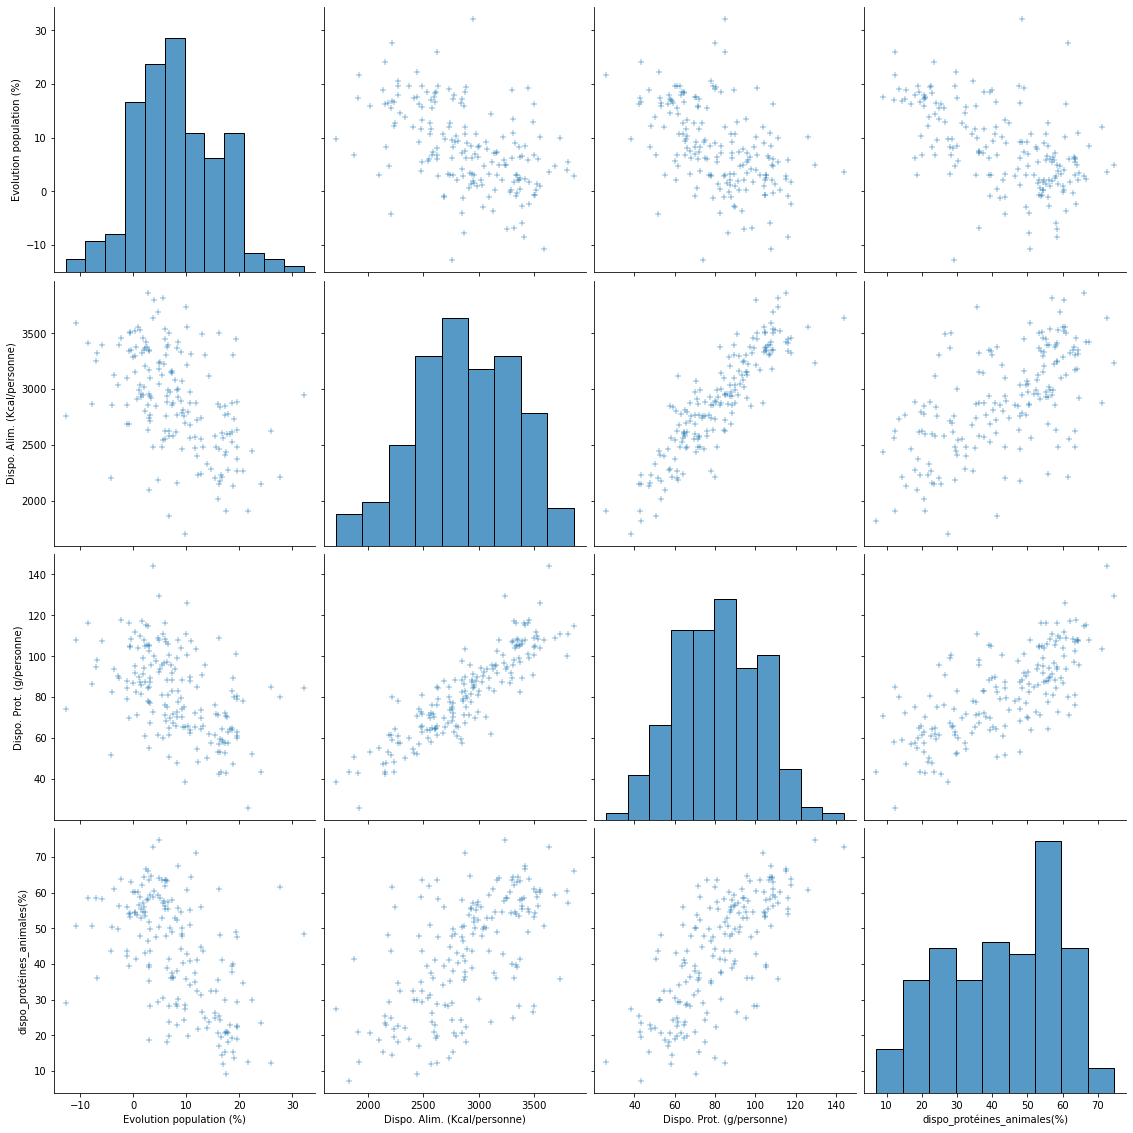

In [572]:
#Premier aperçu des 4 variables initiales (régime alimentaire des pays) 
#Affichage des variables deux à deux avec leur mode de distribution
sns.pairplot(df_dispo_alimen, height=4, markers="+") #Tracer des relations par paires dans un jeu de données.
plt.show()

Quelques remarques peuvent-être apportées, comme la corrélation linéaire de la disponibilité en protéines / disponibilité calorique. 
On a également une idée de la distribution de nos 4 principales variables, avec par exemple  une distribution plutôt symétrique, c'est à dire une distribution normale pour la disponibilité calorique et la disponibilité de protéines . Voyons comment élaborer le partitionnement adéquat aux objectifs fixés.

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Code zone                             178 non-null    int64  
 1   Zone                                  178 non-null    object 
 2   Année                                 178 non-null    int64  
 3   population                            178 non-null    float64
 4   Evolution population (%)              177 non-null    float64
 5   Dispo. Alim. (Kcal/personne)          178 non-null    float64
 6   Dispo. Prot. (g/personne)             178 non-null    float64
 7   dispo_protéines_animales(%)           178 non-null    float64
 8   Croissance annuelle US$ par habitant  178 non-null    float64
 9   PIB Total US$ (Millions)              178 non-null    float64
 10  PIB par habitant                      178 non-null    float64
 11  Disponibilité intér

In [574]:
#Identifier la présence de doublons
print(df.duplicated().sum())


0


In [575]:
#Trouver les valeurs manquantes
df_null=  df.loc[df.isnull().any(axis=1)]
df_null

,Code zone,Zone,Année,population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),dispo_protéines_animales(%),Croissance annuelle US$ par habitant,PIB Total US$ (Millions),PIB par habitant,Disponibilité intérieure,Importations - Quantité,Production,taux_dépendance_importations
19,29,Burundi,2019,11531000.0,NaN,666125.0,15822.75,7.082,-5.516413,3002.350447,260.381563,7.000000e+09,0.000000e+00,7.000000e+09,0.000000
48,72,Djibouti,2019,974000.0,10.306,1020175.0,24064.45,19.733,6.682792,3166.329057,3252.320409,3.000000e+09,3.000000e+09,NaN,100.000000
96,132,Maldives,2019,531000.0,27.644,807380.0,29203.65,61.430,3.378441,5642.163793,10626.484440,1.200000e+10,1.100000e+10,NaN,91.666667
165,236,Venezuela (République bolivarienne du),2019,28516000.0,-4.248,804460.0,18815.75,43.705,-32.978210,134960.288472,4732.820093,4.280000e+11,NaN,4.280000e+11,NaN


In [576]:
df.describe()

,Code zone,Année,population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),dispo_protéines_animales(%),Croissance annuelle US$ par habitant,PIB Total US$ (Millions),PIB par habitant,Disponibilité intérieure,Importations - Quantité,Production,taux_dépendance_importations
count,178.000000,178.0,1.780000e+02,177.000000,1.780000e+02,178.000000,178.000000,178.000000,1.780000e+02,178.000000,1.780000e+02,1.770000e+02,1.760000e+02,177.000000
mean,127.629213,2019.0,5.103642e+07,8.114780,1.052619e+06,29783.712921,42.680882,0.196097,5.638667e+05,14067.468345,8.038764e+11,9.489266e+10,8.620227e+11,44.214572
std,74.740815,0.0,1.863862e+08,7.773391,1.669876e+05,7662.181828,16.098433,7.475384,2.280861e+06,19779.110886,2.760836e+12,2.242218e+11,3.026034e+12,50.192418
min,1.000000,2019.0,5.300000e+04,-12.810000,6.230550e+05,9457.150000,7.082000,-32.978210,1.948667e+02,260.381563,2.000000e+09,0.000000e+00,0.000000e+00,0.000000
25%,66.250000,2019.0,2.790250e+06,2.816000,9.390538e+05,23844.537500,28.918750,-2.994627,1.242825e+04,1863.037073,3.250000e+10,4.000000e+09,1.175000e+10,4.152047
50%,122.500000,2019.0,9.891000e+06,7.197000,1.050835e+06,29621.575000,43.872000,0.093035,4.269907e+04,6047.268633,1.105000e+11,1.900000e+10,7.600000e+10,26.865672
75%,188.750000,2019.0,3.191875e+07,13.826000,1.201854e+06,35398.612500,56.142000,3.213539,2.505294e+05,16818.669192,3.330000e+11,8.600000e+10,3.512500e+11,79.411765
max,351.000000,2019.0,1.465634e+09,32.138000,1.409630e+06,52538.100000,74.662000,28.949443,2.143323e+07,115480.867570,2.138600e+13,1.814000e+12,2.285800e+13,404.026846
